# **Scientific journal recommender for submitting a publication**

In [54]:
import pandas as pd

folder = "dataset/"


from google.colab import drive
drive.mount('/content/drive')
colab_folder = 'drive/MyDrive/Colab Notebooks/ScientificJournalRecommenderForSubmittingPublication/'
folder = colab_folder + folder

df = pd.read_csv(folder + 'selected_cleaned.csv')

target = 'journal'

features = df.columns.tolist()
features.remove(target)

# Text Representation: all the words of the selected features in a single column

df['X'] = df[features[0]]
for i in range(1, len(features)):
    df['X'] = df['X'] + df[features[i]]

# Remove null values
df = df.dropna(subset=['X'])

# Encode target_name
labels = df[target].unique()
df['y'] = df[target].replace(labels, list(range(len(labels))))

# Remove unnecessary columns
df = df[['X', 'y']]
print(df.info())
df.head()
df.to_csv(folder + 'selected_cleaned_combined_text.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11194 entries, 0 to 11193
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       11194 non-null  object
 1   y       11194 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 175.0+ KB
None


Word frequency analysis for feature: X

Number of unique words:  68615
Number of words with frequency >= 2: 27484
Number of words with frequency >= 3: 18874
Number of words with frequency >= 4: 14622
Number of words with frequency >= 5: 11992
Number of words with frequency >= 6: 10251
Number of words with frequency >= 7: 9105
Number of words with frequency >= 8: 8222
Number of words with frequency >= 9: 7575
Number of words with frequency >= 10: 7047
Number of words with frequency >= 11: 6646
Number of words with frequency >= 12: 6296
Number of words with frequency >= 13: 5982
Number of words with frequency >= 14: 5720


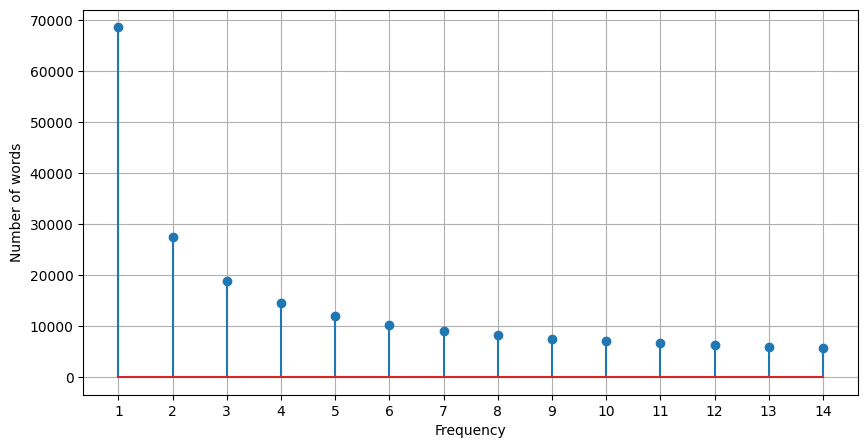

In [55]:
from utils import word_frequency_analysis

df = pd.read_csv(folder + 'selected_cleaned_combined_text.csv')

# Number words for each frequency
number_words_frequency = word_frequency_analysis(df, 'X', 15)

# Divide the dataset into training and test sets

In [56]:
from sklearn.model_selection import train_test_split
import gc

df_train, df_test = train_test_split(df, train_size=0.8, random_state=42)
# Delete df to free memory
df = None
gc.collect()

62813

## Bag of Words

The **Bag of Words** is a representation of a text that describes the occurrence of words within a document.
The Bag of Words is created using the following methods:
* **CountVectorizer**: It counts the number of times a word appears in a document.
* **TfidfVectorizer**: It counts the number of times a word appears in a document, but it also takes into account the frequency of the word in the entire corpus.

Parameters:
* **max_features**: build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

frequency = 13 #7
max_features = number_words_frequency[frequency]
print(f"Words with frequency >= {frequency}: Max features: {max_features}")

bowCount = CountVectorizer(max_features=max_features)

X_train_Count = bowCount.fit_transform(df_train['X']).toarray()
X_test_Count = bowCount.transform(df_test['X']).toarray()

bowTfidf = TfidfVectorizer(max_features=max_features)

X_train_Tfidf = bowTfidf.fit_transform(df_train['X']).toarray()
X_test_Tfidf = bowTfidf.transform(df_test['X']).toarray()

y_train = df_train['y']
y_test = df_test['y']

Words with frequency >= 13: Max features: 5720


## Clasification

The classification is performed using the **Random Forest** algorithm.
It is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

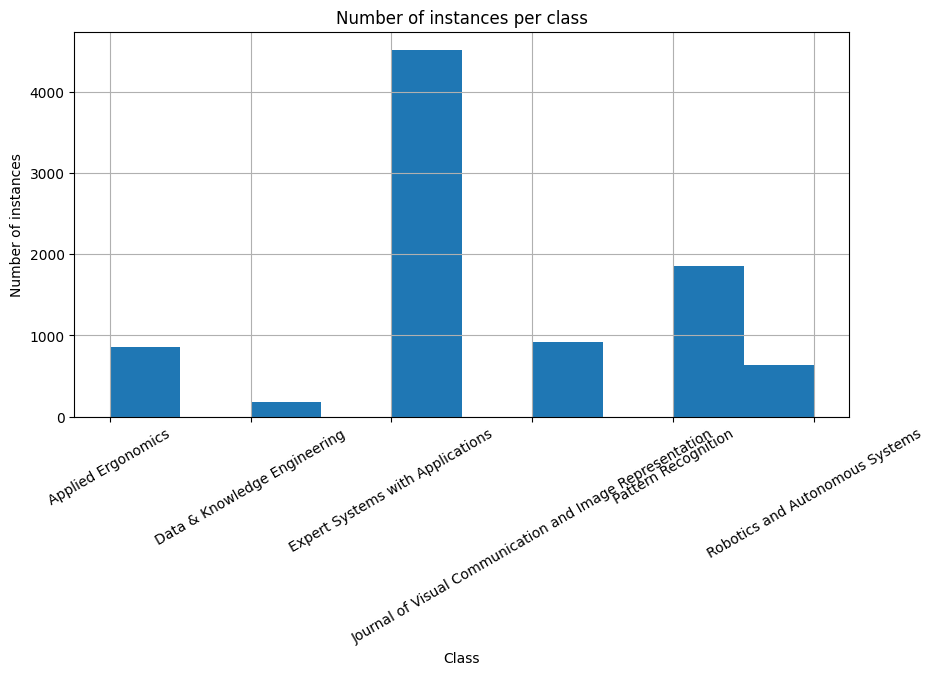

In [58]:
from utils import evaluation_report, plot_class_distribution

plot_class_distribution(y_train, labels)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                          precision    recall  f1-score   support

                                      Applied Ergonomics       0.98      0.90      0.94       214
                            Data & Knowledge Engineering       0.00      0.00      0.00        57
                        Expert Systems with Applications       0.72      0.96      0.83      1098
Journal of Visual Communication and Image Representation       0.90      0.23      0.36       227
                                     Pattern Recognition       0.70      0.58      0.63       493
                         Robotics and Autonomous Systems       0.92      0.73      0.81       150

                                                accuracy                           0.76      2239
                                               macro avg       0.70      0.57      0.60      2239
                                            weighted avg       0.76      0.76      0.73      2239


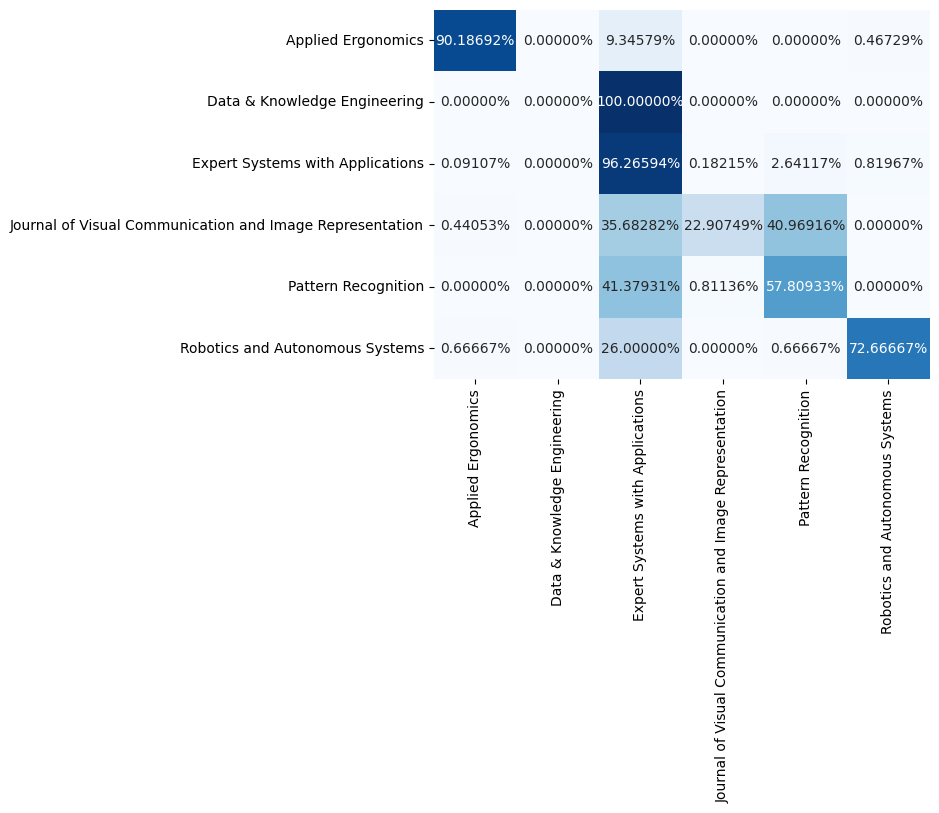

'                                                          precision    recall  f1-score   support\n\n                                      Applied Ergonomics       0.98      0.90      0.94       214\n                            Data & Knowledge Engineering       0.00      0.00      0.00        57\n                        Expert Systems with Applications       0.72      0.96      0.83      1098\nJournal of Visual Communication and Image Representation       0.90      0.23      0.36       227\n                                     Pattern Recognition       0.70      0.58      0.63       493\n                         Robotics and Autonomous Systems       0.92      0.73      0.81       150\n\n                                                accuracy                           0.76      2239\n                                               macro avg       0.70      0.57      0.60      2239\n                                            weighted avg       0.76      0.76      0.73      2239\n'

In [59]:
from sklearn.ensemble import RandomForestClassifier

# BoW ConuntVectorizer
cls = RandomForestClassifier()
cls.fit(X_train_Count, y_train)
y_pred = cls.predict(X_test_Count)

evaluation_report(y_test, y_pred, labels)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                          precision    recall  f1-score   support

                                      Applied Ergonomics       0.96      0.90      0.93       214
                            Data & Knowledge Engineering       0.00      0.00      0.00        57
                        Expert Systems with Applications       0.72      0.97      0.82      1098
Journal of Visual Communication and Image Representation       0.88      0.20      0.33       227
                                     Pattern Recognition       0.71      0.57      0.63       493
                         Robotics and Autonomous Systems       0.92      0.68      0.78       150

                                                accuracy                           0.75      2239
                                               macro avg       0.70      0.55      0.58      2239
                                            weighted avg       0.75      0.75      0.72      2239


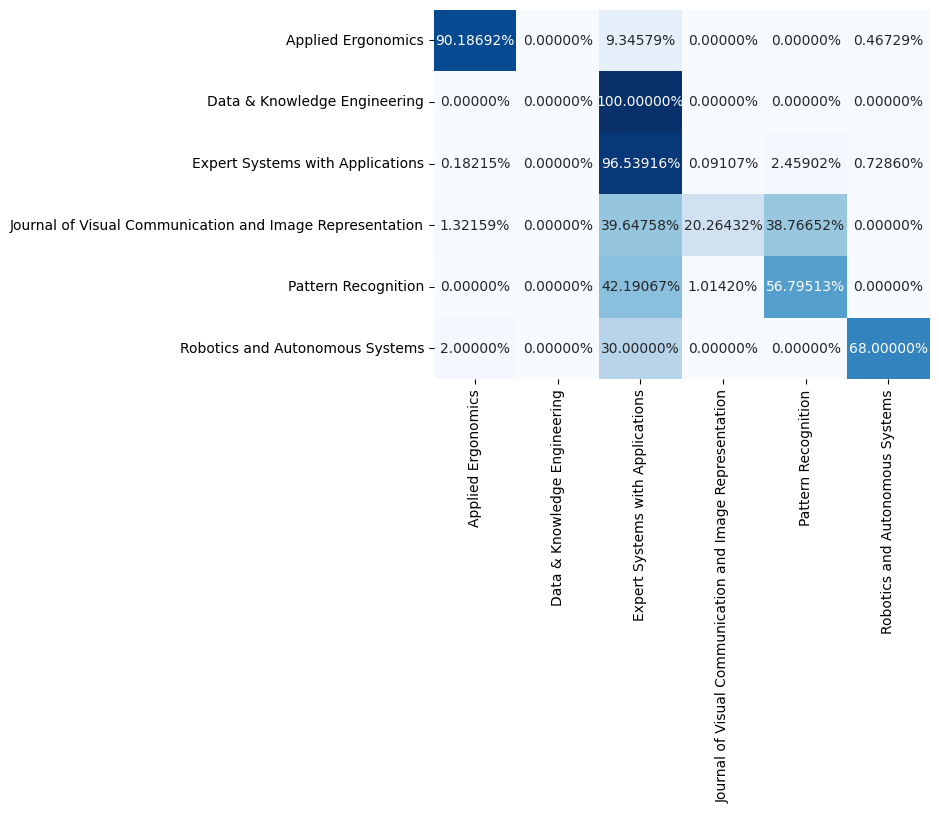

'                                                          precision    recall  f1-score   support\n\n                                      Applied Ergonomics       0.96      0.90      0.93       214\n                            Data & Knowledge Engineering       0.00      0.00      0.00        57\n                        Expert Systems with Applications       0.72      0.97      0.82      1098\nJournal of Visual Communication and Image Representation       0.88      0.20      0.33       227\n                                     Pattern Recognition       0.71      0.57      0.63       493\n                         Robotics and Autonomous Systems       0.92      0.68      0.78       150\n\n                                                accuracy                           0.75      2239\n                                               macro avg       0.70      0.55      0.58      2239\n                                            weighted avg       0.75      0.75      0.72      2239\n'

In [60]:
# BoW TfidfVectorizer
cls = RandomForestClassifier()
cls.fit(X_train_Tfidf, y_train)
y_pred = cls.predict(X_test_Tfidf)

evaluation_report(y_test, y_pred, labels)

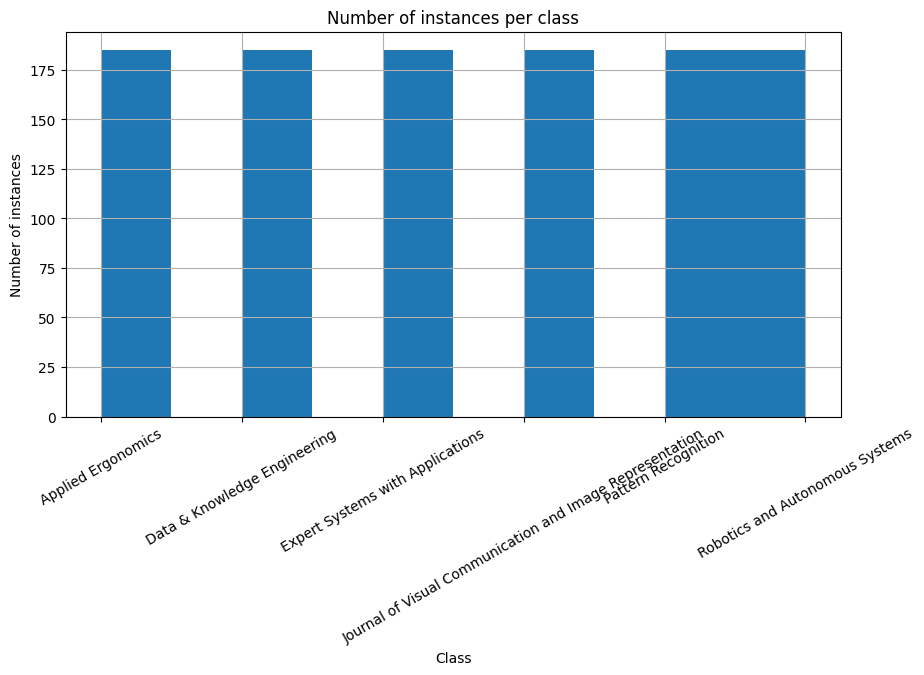

                                                          precision    recall  f1-score   support

                                      Applied Ergonomics       0.80      0.98      0.88       214
                            Data & Knowledge Engineering       0.12      0.77      0.21        57
                        Expert Systems with Applications       0.91      0.44      0.59      1098
Journal of Visual Communication and Image Representation       0.37      0.70      0.49       227
                                     Pattern Recognition       0.57      0.52      0.54       493
                         Robotics and Autonomous Systems       0.66      0.90      0.76       150

                                                accuracy                           0.57      2239
                                               macro avg       0.57      0.72      0.58      2239
                                            weighted avg       0.73      0.57      0.60      2239


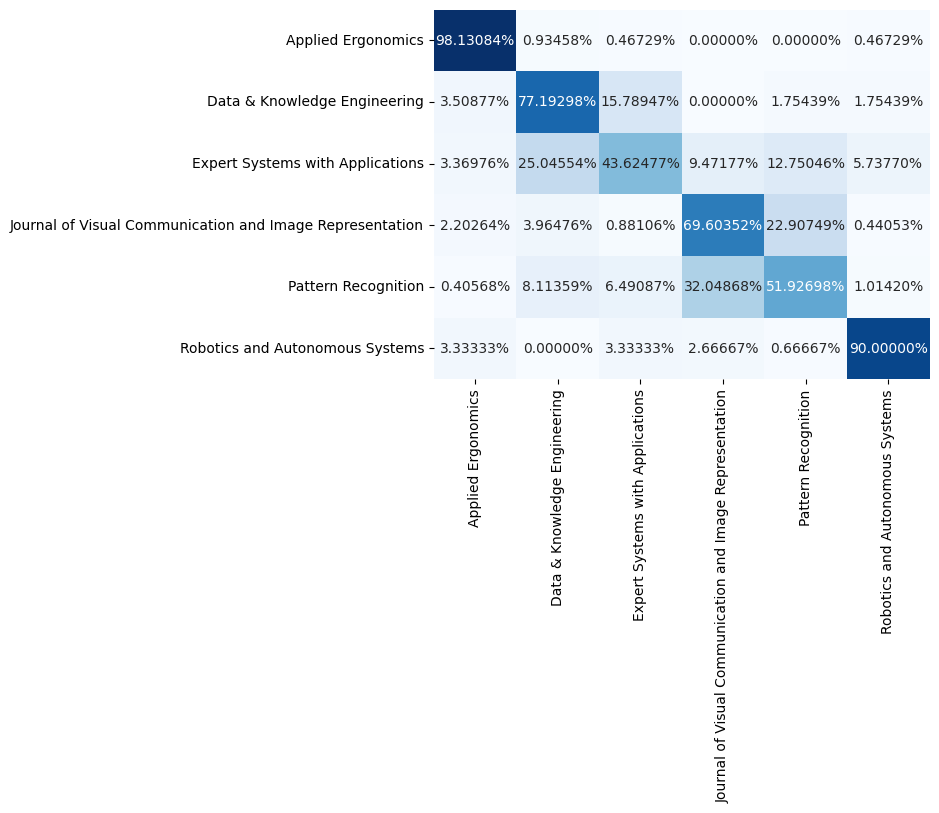

'                                                          precision    recall  f1-score   support\n\n                                      Applied Ergonomics       0.80      0.98      0.88       214\n                            Data & Knowledge Engineering       0.12      0.77      0.21        57\n                        Expert Systems with Applications       0.91      0.44      0.59      1098\nJournal of Visual Communication and Image Representation       0.37      0.70      0.49       227\n                                     Pattern Recognition       0.57      0.52      0.54       493\n                         Robotics and Autonomous Systems       0.66      0.90      0.76       150\n\n                                                accuracy                           0.57      2239\n                                               macro avg       0.57      0.72      0.58      2239\n                                            weighted avg       0.73      0.57      0.60      2239\n'

In [61]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=42)

# BoW ConuntVectorizer
X_train_under_sampled, y_train_under_sampled = sampler.fit_resample(X_train_Count, y_train)
plot_class_distribution(y_train_under_sampled, labels)

cls = RandomForestClassifier()
cls.fit(X_train_under_sampled, y_train_under_sampled)
y_pred = cls.predict(X_test_Count)

evaluation_report(y_test, y_pred, labels)

                                                          precision    recall  f1-score   support

                                      Applied Ergonomics       0.80      0.97      0.88       214
                            Data & Knowledge Engineering       0.12      0.68      0.21        57
                        Expert Systems with Applications       0.89      0.48      0.63      1098
Journal of Visual Communication and Image Representation       0.39      0.68      0.50       227
                                     Pattern Recognition       0.60      0.55      0.57       493
                         Robotics and Autonomous Systems       0.62      0.91      0.73       150

                                                accuracy                           0.60      2239
                                               macro avg       0.57      0.71      0.59      2239
                                            weighted avg       0.73      0.60      0.62      2239


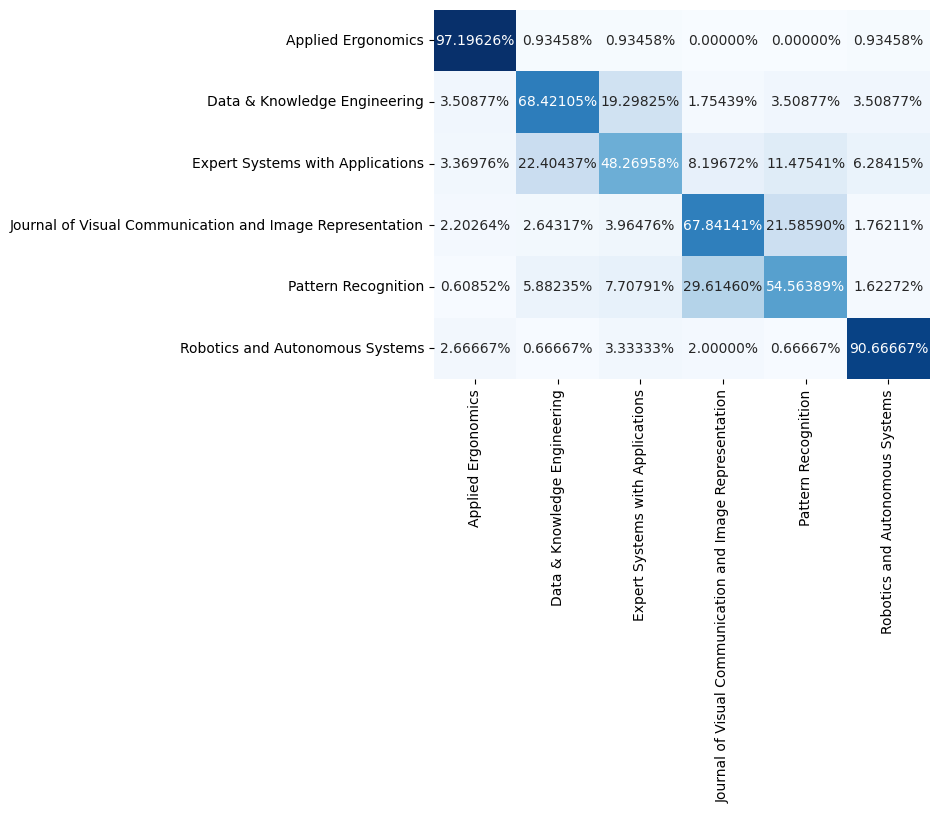

22823

In [62]:
from imblearn.under_sampling import RandomUnderSampler
import gc

sampler = RandomUnderSampler(random_state=42)

# BoW TfidfVectorizer
X_train_under_sampled, y_train_under_sampled = sampler.fit_resample(X_train_Tfidf, y_train)

cls = RandomForestClassifier()
cls.fit(X_train_under_sampled, y_train_under_sampled)
y_pred = cls.predict(X_test_Tfidf)

evaluation_report(y_test, y_pred, labels)

X_train_under_sampled = None
y_train_under_sampled = None

gc.collect()

In [16]:
from collections import Counter

# Calculate and Sort the class distributions by count
class_distribution = Counter(y_train).values()
sample_number = sorted(class_distribution, reverse=True)

sample_number = sample_number[1]

# Using a sampling strategy that limits the number of samples to the size of the n class
sampling_strategy = {key: min(value, sample_number) for key, value in class_distribution.items()}

TypeError: unhashable type: 'numpy.ndarray'

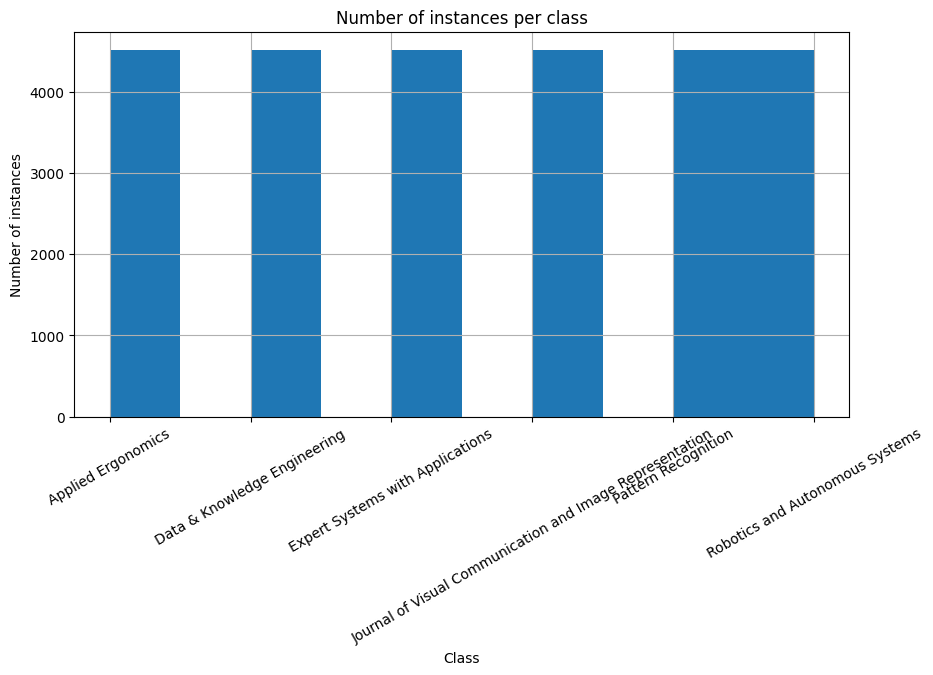

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                          precision    recall  f1-score   support

                                      Applied Ergonomics       0.93      0.97      0.95       214
                            Data & Knowledge Engineering       0.00      0.00      0.00        57
                        Expert Systems with Applications       0.78      0.91      0.84      1098
Journal of Visual Communication and Image Representation       0.69      0.35      0.47       227
                                     Pattern Recognition       0.68      0.65      0.67       493
                         Robotics and Autonomous Systems       0.85      0.81      0.83       150

                                                accuracy                           0.77      2239
                                               macro avg       0.65      0.62      0.62      2239
                                            weighted avg       0.75      0.77      0.75      2239


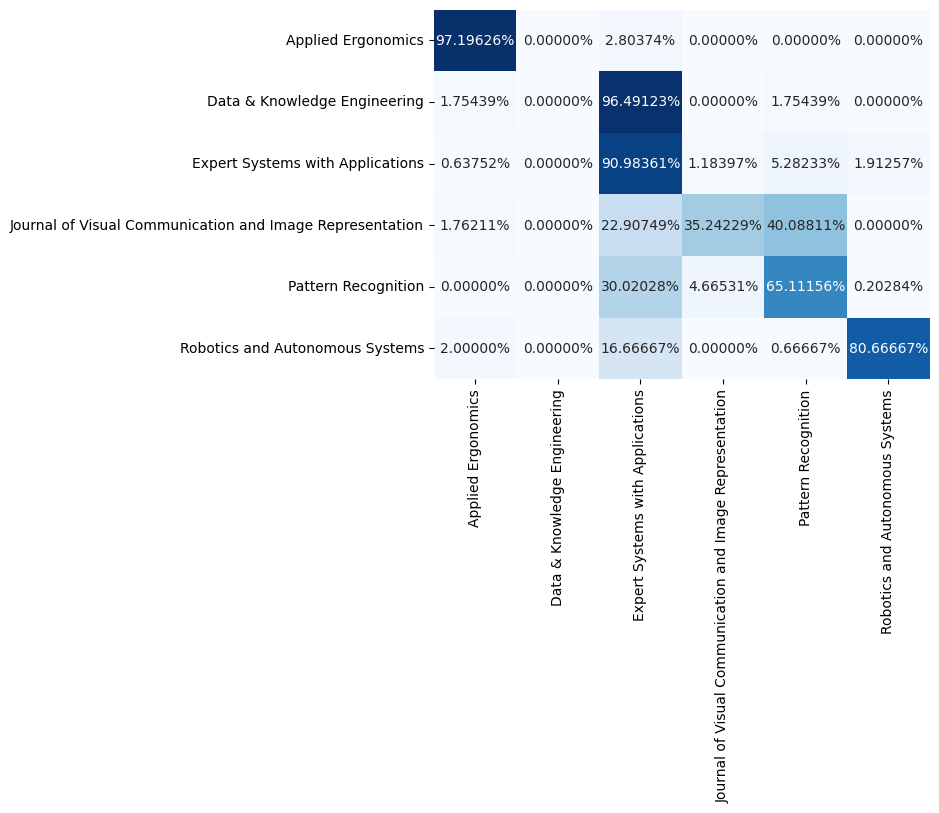

'                                                          precision    recall  f1-score   support\n\n                                      Applied Ergonomics       0.93      0.97      0.95       214\n                            Data & Knowledge Engineering       0.00      0.00      0.00        57\n                        Expert Systems with Applications       0.78      0.91      0.84      1098\nJournal of Visual Communication and Image Representation       0.69      0.35      0.47       227\n                                     Pattern Recognition       0.68      0.65      0.67       493\n                         Robotics and Autonomous Systems       0.85      0.81      0.83       150\n\n                                                accuracy                           0.77      2239\n                                               macro avg       0.65      0.62      0.62      2239\n                                            weighted avg       0.75      0.77      0.75      2239\n'

In [63]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

sampler = RandomOverSampler(random_state=42, sampling_strategy=sampling_strategy)

# Resample the dataset
X_train_over_sampled, y_train_over_sampled = sampler.fit_resample(X_train_Count, y_train)

# Plot the class distribution after resampling (you might need to adjust this part based on your plotting function)
plot_class_distribution(y_train_over_sampled, labels)

# Train a RandomForestClassifier on the oversampled dataset
cls = RandomForestClassifier()
cls.fit(X_train_over_sampled, y_train_over_sampled)
y_pred = cls.predict(X_test_Count)

# Evaluate the model
evaluation_report(y_test, y_pred, labels)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                          precision    recall  f1-score   support

                                      Applied Ergonomics       0.94      0.94      0.94       214
                            Data & Knowledge Engineering       0.00      0.00      0.00        57
                        Expert Systems with Applications       0.75      0.92      0.83      1098
Journal of Visual Communication and Image Representation       0.77      0.35      0.48       227
                                     Pattern Recognition       0.70      0.62      0.65       493
                         Robotics and Autonomous Systems       0.84      0.79      0.82       150

                                                accuracy                           0.77      2239
                                               macro avg       0.67      0.60      0.62      2239
                                            weighted avg       0.75      0.77      0.74      2239


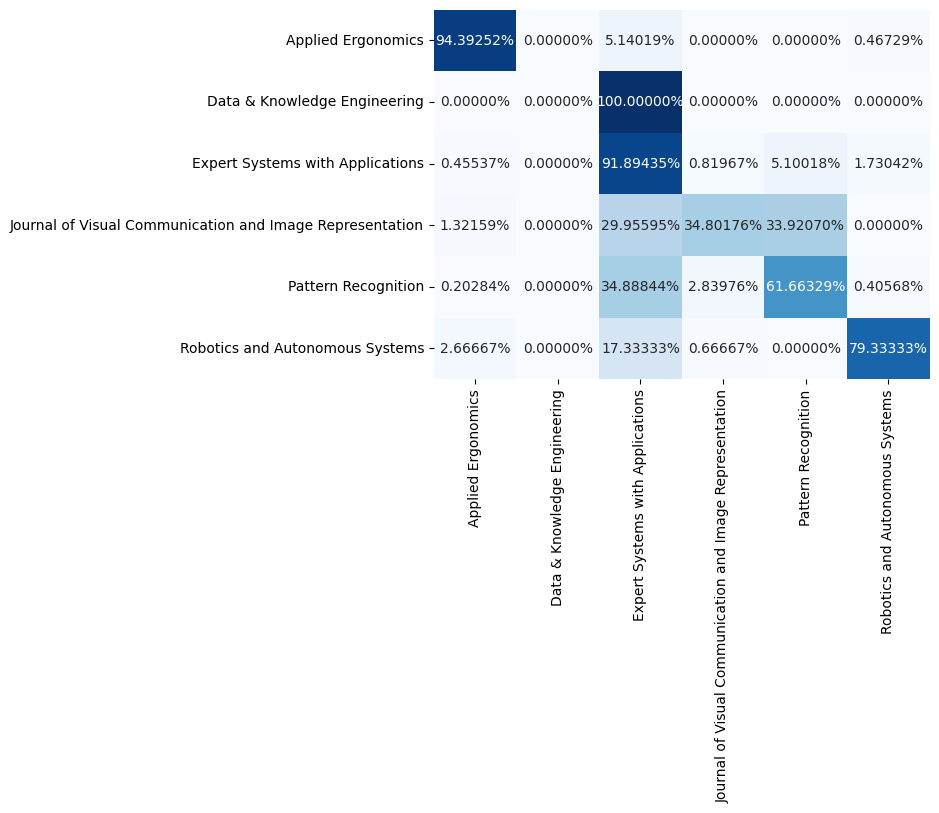

'                                                          precision    recall  f1-score   support\n\n                                      Applied Ergonomics       0.94      0.94      0.94       214\n                            Data & Knowledge Engineering       0.00      0.00      0.00        57\n                        Expert Systems with Applications       0.75      0.92      0.83      1098\nJournal of Visual Communication and Image Representation       0.77      0.35      0.48       227\n                                     Pattern Recognition       0.70      0.62      0.65       493\n                         Robotics and Autonomous Systems       0.84      0.79      0.82       150\n\n                                                accuracy                           0.77      2239\n                                               macro avg       0.67      0.60      0.62      2239\n                                            weighted avg       0.75      0.77      0.74      2239\n'

In [64]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=42, sampling_strategy=sampling_strategy)

# BoW TfidfVectorizer
X_train_over_sampled, y_train_over_sampled = sampler.fit_resample(X_train_Tfidf, y_train)

cls = RandomForestClassifier()
cls.fit(X_train_over_sampled, y_train_over_sampled)
y_pred = cls.predict(X_test_Tfidf)

evaluation_report(y_test, y_pred, labels)

In [65]:
# Cleaning memory
import gc

bowCount = None
bowTfidf = None
X_train = None
X_test = None
y_test = None
y_train = None
y_pred = None
X_train_over_sampled = None
y_train_over_sampled = None
X_train_Count = None
X_test_Count = None
X_train_Tfidf = None
X_test_Tfidf = None

gc.collect()

10287


## Connectionist techniques

In this case, after pre-processing, a neural network based on an LSTM unit is trained.

In [1]:
import tensorflow as tf
import pandas as pd
device = tf.config.list_physical_devices('GPU')

folder = 'dataset/'
'''
from google.colab import drive
drive.mount('/content/drive')
folder = 'drive/MyDrive/Colab Notebooks/ScientificJournalRecommenderForSubmittingPublication/' + folder
'''
df = pd.read_csv(folder + 'selected_cleaned.csv')

target = 'journal'

features = df.columns.tolist()
features.remove(target)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11194 entries, 0 to 11193
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   abstract  11194 non-null  object
 1   keywords  11194 non-null  object
 2   title     11194 non-null  object
 3   journal   11194 non-null  object
dtypes: object(4)
memory usage: 349.9+ KB


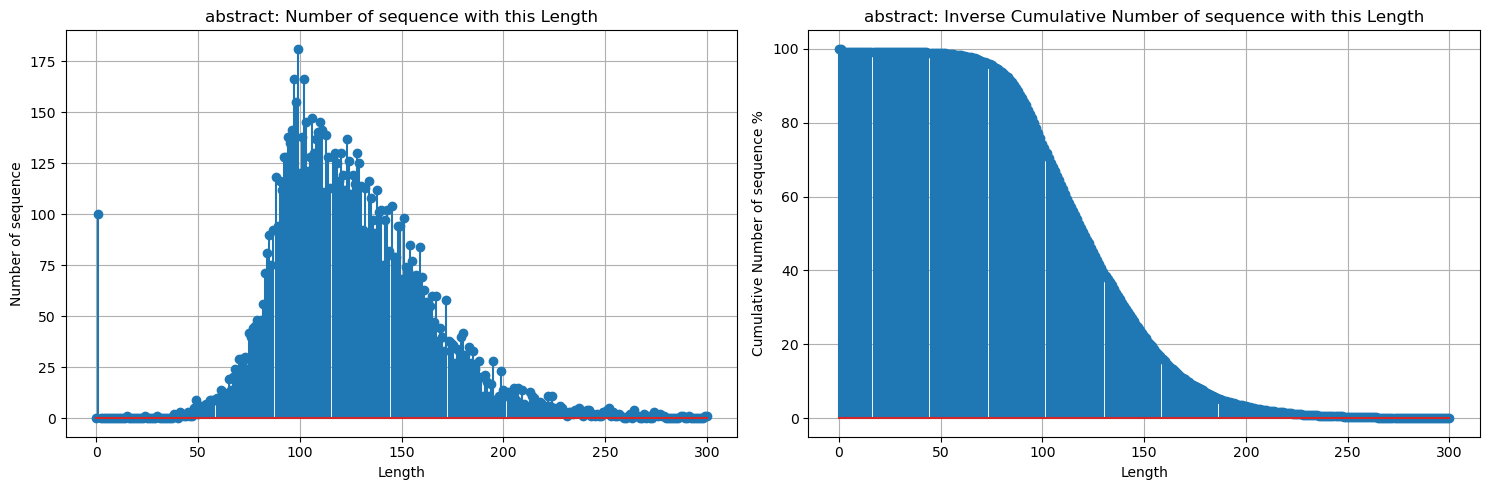

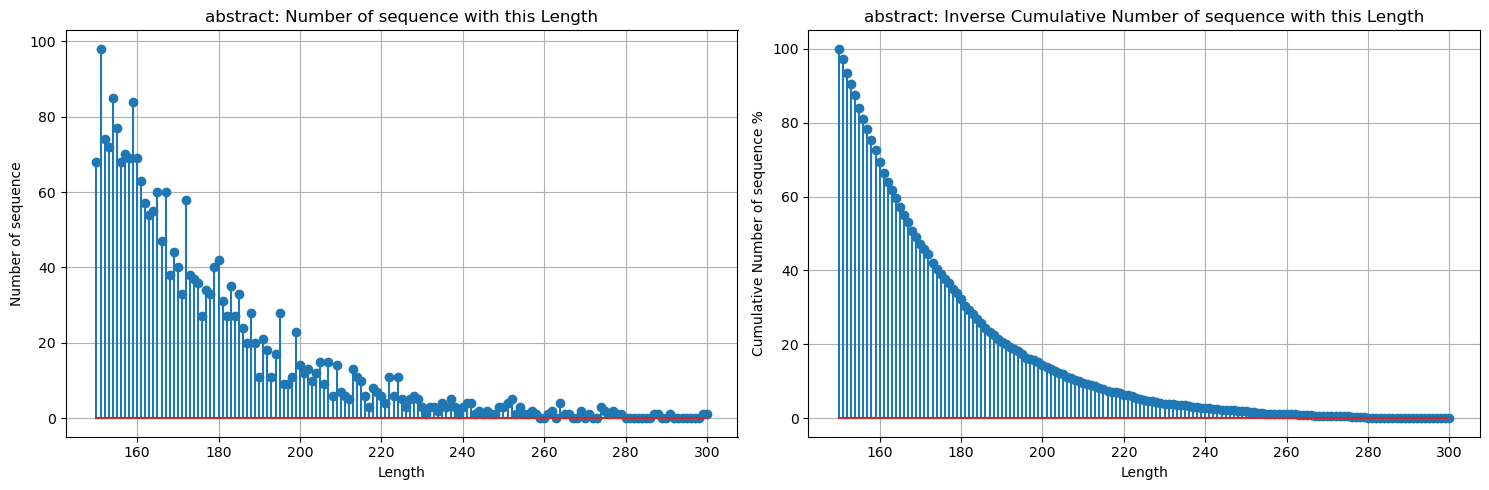

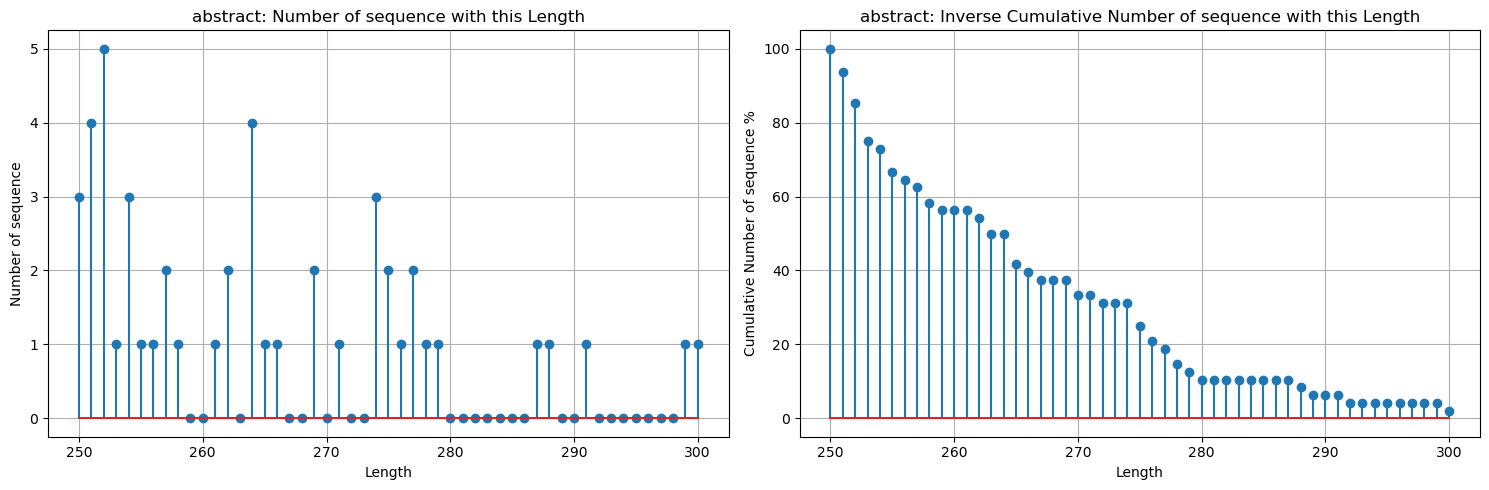

In [2]:
from utils import sentences_length_analysis
from utils import word_frequency_analysis

sentences_length = {}
number_words_frequency = {}

feature = features[0]
sentences_length_analysis(df, feature, [0, 300])
sentences_length_analysis(df, feature, [150, 300])
sentences_length_analysis(df, feature, [250, 300])

Word frequency analysis for feature: abstract
Number of unique words:  48230
Number of words with frequency >= 2: 24420
Number of words with frequency >= 3: 17047
Number of words with frequency >= 4: 13290
Number of words with frequency >= 5: 10896
Number of words with frequency >= 6: 9367
Number of words with frequency >= 7: 8313
Number of words with frequency >= 8: 7587
Number of words with frequency >= 9: 6995
Number of words with frequency >= 10: 6534
Number of words with frequency >= 11: 6142
Number of words with frequency >= 12: 5839
Number of words with frequency >= 13: 5530
Number of words with frequency >= 14: 5280
Number of words with frequency >= 15: 5079
Number of words with frequency >= 16: 4894
Number of words with frequency >= 17: 4690
Number of words with frequency >= 18: 4549
Number of words with frequency >= 19: 4404


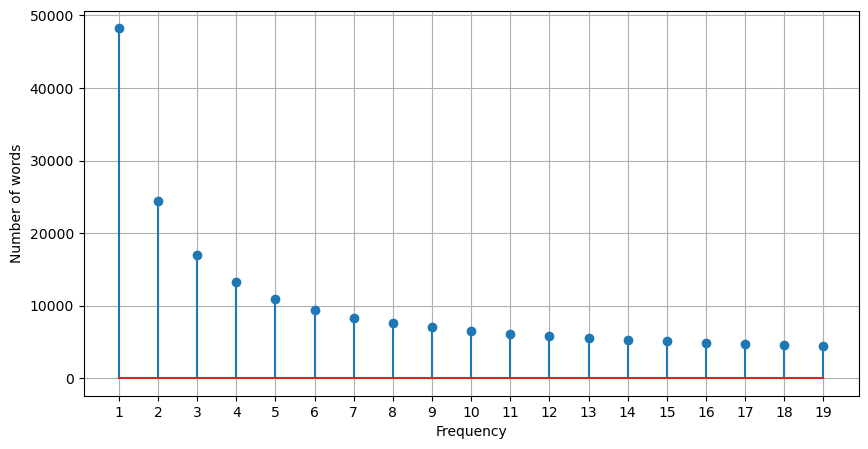

In [3]:
sentences_length[feature] = 280

number_words_frequency[feature] = word_frequency_analysis(df, feature, 20)

In [4]:
frequency = 4
number_words_frequency[feature] = number_words_frequency[feature][frequency]

print(f"Feature: {feature}")
print(f"Words with frequency >= {frequency}: {number_words_frequency[feature]}")
print(f"Sentences length: {sentences_length[feature]}")

Feature: abstract
Words with frequency >= 4: 10896
Sentences length: 280


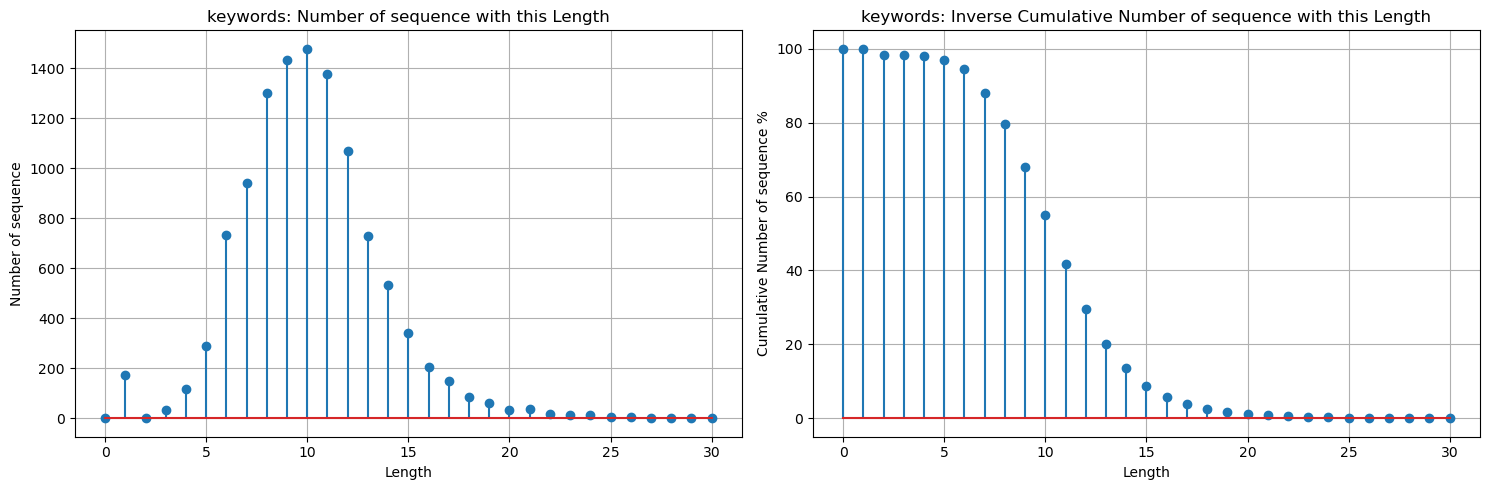

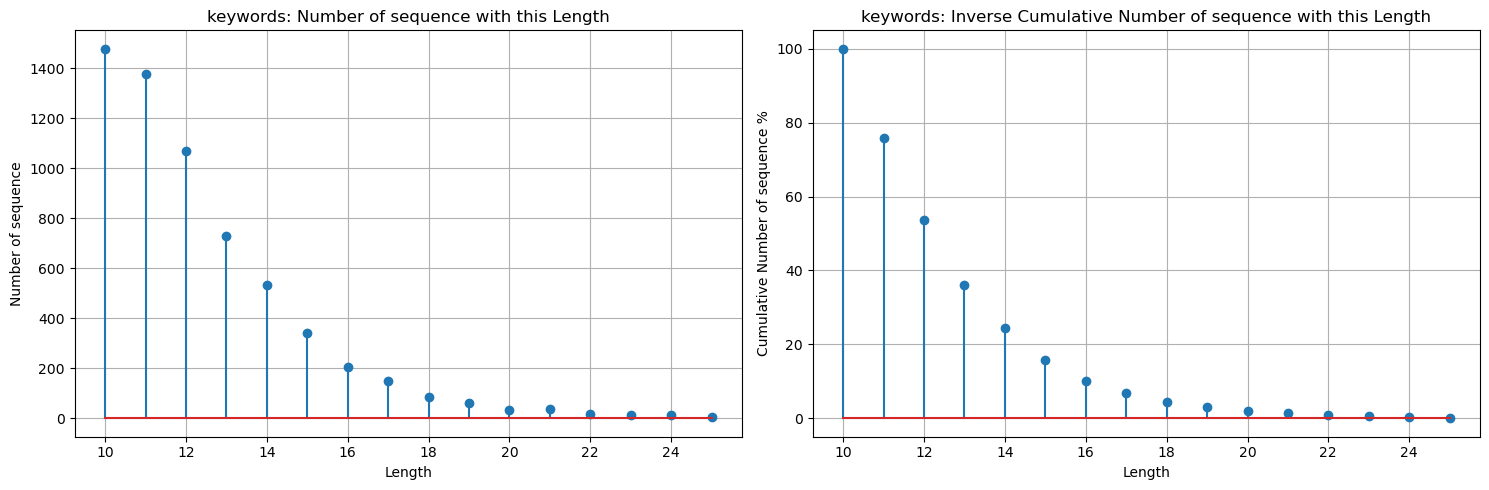

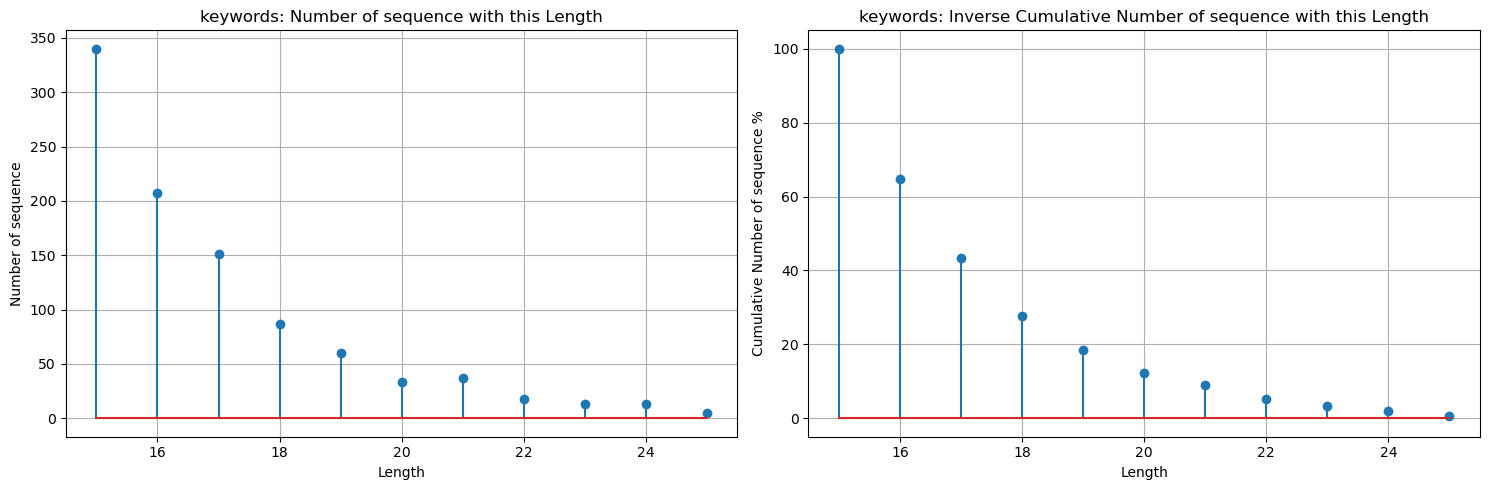

In [5]:
feature = features[1]

sentences_length_analysis(df, feature, [0, 30])
sentences_length_analysis(df, feature, [10, 25])
sentences_length_analysis(df, feature, [15, 25])

Word frequency analysis for feature: keywords

Number of unique words:  13477
Number of words with frequency >= 2: 5973
Number of words with frequency >= 3: 4271
Number of words with frequency >= 4: 3439
Number of words with frequency >= 5: 2889
Number of words with frequency >= 6: 2514
Number of words with frequency >= 7: 2239
Number of words with frequency >= 8: 2018
Number of words with frequency >= 9: 1830
Number of words with frequency >= 10: 1687
Number of words with frequency >= 11: 1558
Number of words with frequency >= 12: 1452
Number of words with frequency >= 13: 1370
Number of words with frequency >= 14: 1295
Number of words with frequency >= 15: 1233
Number of words with frequency >= 16: 1173
Number of words with frequency >= 17: 1108
Number of words with frequency >= 18: 1054
Number of words with frequency >= 19: 1013
Number of words with frequency >= 20: 968
Number of words with frequency >= 21: 924
Number of words with frequency >= 22: 891
Number of words with frequency

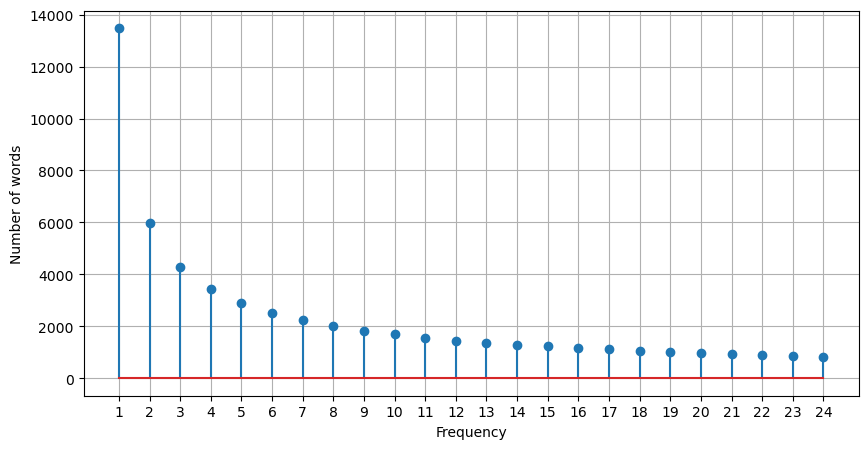

In [6]:
sentences_length[feature] = 18

number_words_frequency[feature] = word_frequency_analysis(df, feature, 25)

In [7]:
frequency = 2
number_words_frequency[feature] = number_words_frequency[feature][frequency]

print(f"Feature: {feature}")
print(f"Words with frequency >= {frequency}: {number_words_frequency[feature]}")
print(f"Sentences length: {sentences_length[feature]}")

Feature: keywords
Words with frequency >= 2: 4271
Sentences length: 18


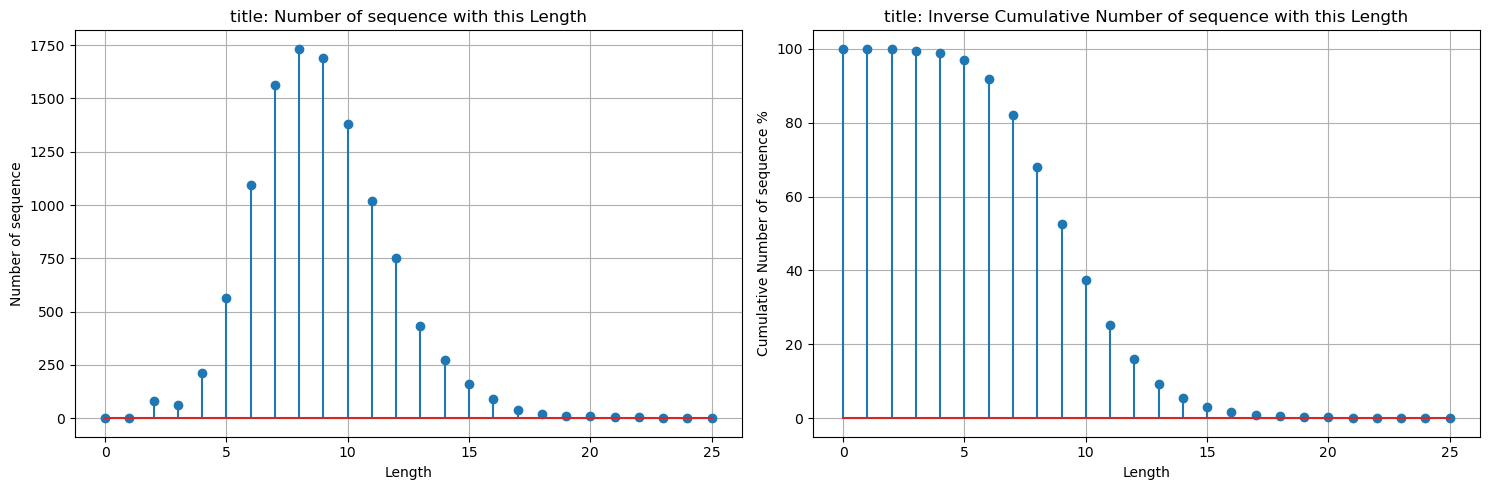

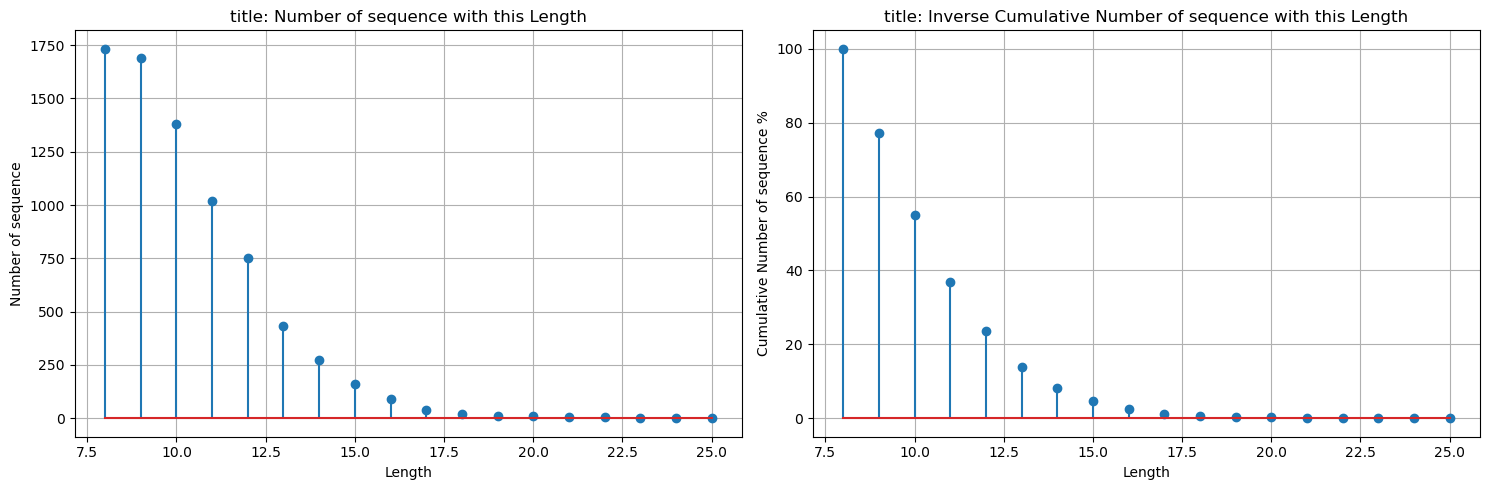

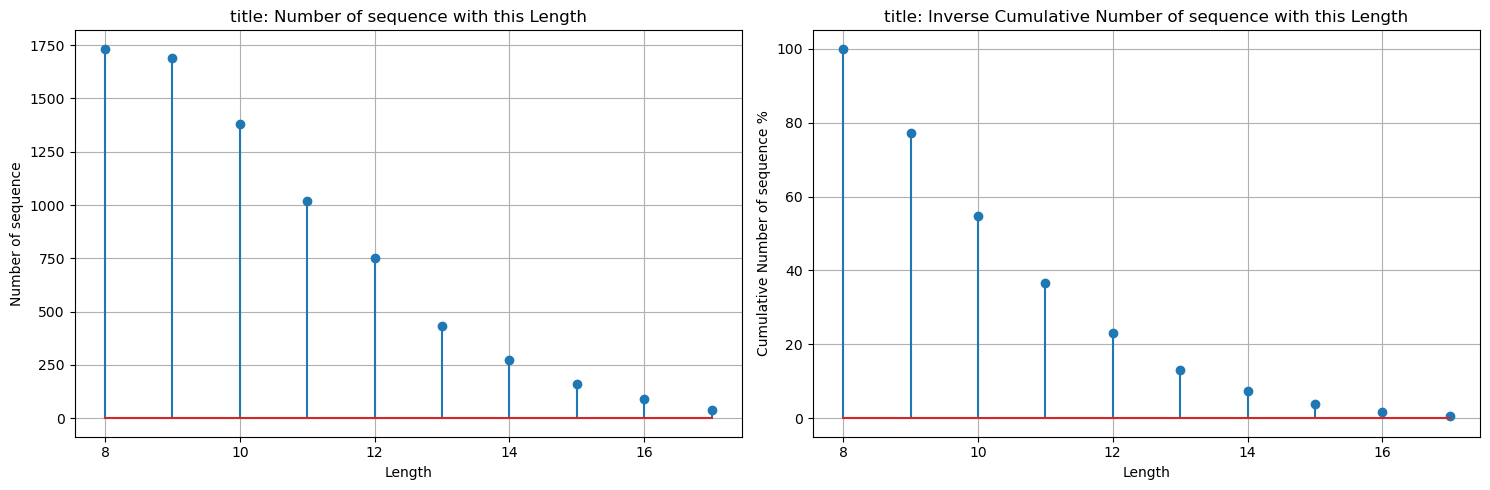

In [8]:
feature = features[2]

sentences_length_analysis(df, feature, [0, 30])
sentences_length_analysis(df, feature, [8, 25])
sentences_length_analysis(df, feature, [8, 17])

Word frequency analysis for feature: title

Number of unique words:  14068
Number of words with frequency >= 2: 5749
Number of words with frequency >= 3: 4034
Number of words with frequency >= 4: 3238
Number of words with frequency >= 5: 2725
Number of words with frequency >= 6: 2361
Number of words with frequency >= 7: 2080
Number of words with frequency >= 8: 1888
Number of words with frequency >= 9: 1735
Number of words with frequency >= 10: 1594
Number of words with frequency >= 11: 1471
Number of words with frequency >= 12: 1368
Number of words with frequency >= 13: 1280
Number of words with frequency >= 14: 1201
Number of words with frequency >= 15: 1138
Number of words with frequency >= 16: 1076
Number of words with frequency >= 17: 1014
Number of words with frequency >= 18: 968
Number of words with frequency >= 19: 929


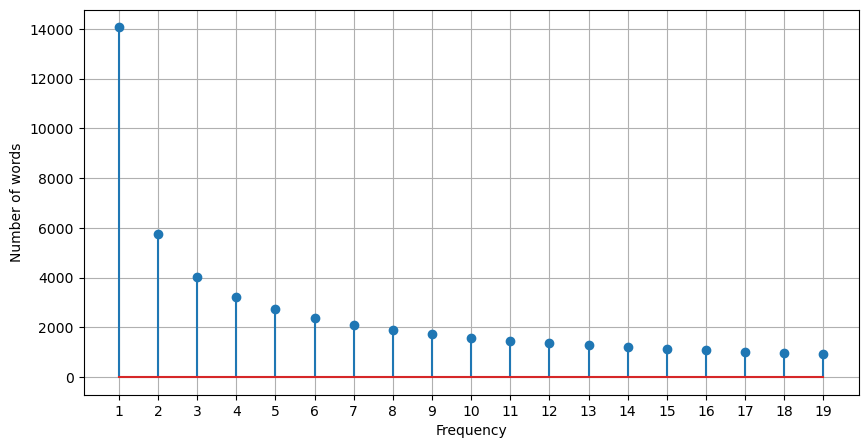

In [9]:
sentences_length[feature] = 14

number_words_frequency[feature] = word_frequency_analysis(df, feature, 20)

In [10]:
frequency = 2
number_words_frequency[feature] = number_words_frequency[feature][frequency]

print(f"Feature: {feature}")
print(f"Words with frequency >= {frequency}: {number_words_frequency[feature]}")
print(f"Sentences length: {sentences_length[feature]}")

Feature: title
Words with frequency >= 2: 4034
Sentences length: 14


In [11]:
# Convert list of words to string representation
def join_elements(list_like_string):
    return ' '.join(eval(list_like_string))

for feature in features:
    df[feature] = df[feature].apply(join_elements)

df.fillna("").astype(str)
df.to_csv(folder + 'selected_cleaned_sentences.csv', index=False)

In [21]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

df = pd.read_csv(folder + 'selected_cleaned_sentences.csv')

target = 'journal'

features = df.columns.tolist()
features.remove(target)

# Replacing labels names with int
labels = df[target].unique()
num_classes = len(labels)
df[target] = df[target].replace(labels, list(range(len(labels))))

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Convert int labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

X_train = X_train.fillna("").astype(str)
X_test = X_test.fillna("").astype(str)

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text for each feature
def tokenize_text_feature(X_train, X_test, length_analysis, number_words_frequency):
    print(f"Number words: {number_words_frequency}\t-\tSequence length: {length_analysis}")

    tokenizer = Tokenizer(num_words=number_words_frequency)
    tokenizer.fit_on_texts(X_train)

    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_train_pad = pad_sequences(X_train_seq, maxlen=length_analysis)

    X_test_seq = tokenizer.texts_to_sequences(X_test)
    X_test_pad = pad_sequences(X_test_seq, maxlen=length_analysis)

    return X_train_pad, X_test_pad

def tokenize_text(X_train, X_test, features, length_analysis, number_words_frequency):
    X_train_pad = dict()
    X_test_pad = dict()

    for feature in features:
        print('Feature: ' + feature)
        X_train_pad[feature], X_test_pad[feature] = tokenize_text_feature(X_train[feature], X_test[feature], length_analysis[feature], number_words_frequency[feature])

    return X_train_pad, X_test_pad

X_train_pad, X_test_pad = tokenize_text(X_train, X_test, features, sentences_length, number_words_frequency)

Feature: abstract
Number words: 10896	-	Sequence length: 280
Feature: keywords
Number words: 4271	-	Sequence length: 18
Feature: title
Number words: 4034	-	Sequence length: 14


In [40]:
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, concatenate, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

def create_model(features, length_analysis, number_words, embedding_dims, lstm_units, dense_sizes, dropouts, num_classes, use_normalization=False):
    inputs = []
    models = []

    model_name = f"{'Norm_' if use_normalization else ''}Embed_{'_'.join([f'{feat}{dim}' for feat, dim in embedding_dims.items()])}_LSTM_{'_'.join([f'{feat}{unit}' for feat, unit in lstm_units.items()])}_Dense_{'_'.join(map(str, dense_sizes))}_Drop_{'_'.join(map(str, dropouts))}"

    print("Creating model: ", model_name)

    for feature in features:
        input_layer = Input(shape=(length_analysis[feature],), name=feature)
        inputs.append(input_layer)

        embedding_layer = Embedding(
            input_dim=number_words[feature],
            output_dim=embedding_dims[feature],
            input_length=length_analysis[feature],
            name=f'{feature}_Embedding'
        )(input_layer)

        lstm_layer = Bidirectional(LSTM(
            units=lstm_units[feature],
            dropout=0.2,
            recurrent_dropout=0.2),
            name=f'{feature}_Bidirectional_LSTM'
        )(embedding_layer)
        models.append(lstm_layer)

    concatenated_features = concatenate(models, name='Concatenate_Features')
    if use_normalization:
        concatenated_features = BatchNormalization(name='Batch_Normalization')(concatenated_features)

    for i, (dense_size, dropout) in enumerate(zip(dense_sizes, dropouts)):
        if i == 0:
            dense_layer = Dense(dense_size, activation='relu', name=f'Dense_{i+1}')(concatenated_features)
        else:
            dense_layer = Dense(dense_size, activation='relu', name=f'Dense_{i+1}')(dropout_layer)

        dropout_layer = Dropout(dropout, name=f'Dropout_{i+1}')(dense_layer)

    output_layer = Dense(units=num_classes, activation='softmax', name=f'Output')(dropout_layer)

    model = Model(inputs=inputs, outputs=output_layer, name=model_name)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_score])
    print(model.summary())

    return model

def train_model(model, X_train, y_train, X_test, y_test, batch_size=64, epochs=20, patience=10):
    print(f"Training model: {model.name}")

    X_train = [X_train[feature] for feature in features]
    X_test = [X_test[feature] for feature in features]

    history = model.fit(
        X_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_test, y_test),
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
        ]
    )

    # Plot Loss
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss: {model.name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.grid(True)

    # Plot F1 Score
    plt.subplot(1, 2, 2)
    plt.plot(history.history['f1_score'], label='Train F1 Score')
    plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
    plt.title(f'Model F1 Score: {model.name}')
    plt.ylabel('F1 Score')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Return best validation F1 score
    score = max(history.history['val_f1_score'])
    print(score)

    return score

def evaluate_model(model, X_test, y_test, labels):
    print(f"Evaluating model: {model.name}")
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)

    return evaluation_report(y_test, y_pred, labels)

# First attemp model

In [ ]:
embedding_dims = {
    features[0]: 200,
    features[1]: 150,
    features[2]: 150
}

lstm_units = {
    features[0]: 200,
    features[1]: 20,
    features[2]: 20
}

dense_sizes = [128, 256]

dropouts = [0.3, 0.4, 0.6]

model = create_model(features, sentences_length, number_words_frequency, embedding_dims, lstm_units, dense_sizes, dropouts, num_classes, use_normalization=False)

score = train_model(model, X_train, y_train, X_test, y_test, batch_size=8, epochs=20, patience=10)

evaluation_report = evaluate_model(model, X_test, y_test, labels)

Creating model:  Embed_abstract200_keywords150_title150_LSTM_abstract200_keywords20_title20_Dense_128_256_Drop_0.3_0.4_0.6
Model: "Embed_abstract200_keywords150_title150_LSTM_abstract200_keywords20_title20_Dense_128_256_Drop_0.3_0.4_0.6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 abstract (InputLayer)       [(None, 280)]                0         []                            
                                                                                                  
 keywords (InputLayer)       [(None, 18)]                 0         []                            
                                                                                                  
 title (InputLayer)          [(None, 14)]                 0         []                            
                                                                     

In [ ]:
!pip install deap

In [91]:
models = {}
evaluation_reports = {}

import random
from deap import base, creator, tools, algorithms

# Define hyperparameter ranges for each feature
embedding_dim_ranges = {
    features[0]: [150, 200],
    features[1]: [100, 150],
    features[2]: [100, 150]
}

lstm_units_ranges = {
    features[0]: [100, 200, 300],
    features[1]: [10, 20, 30],
    features[2]: [10, 20, 30]
}

dense_sizes_range = [[64, 128], [128, 256]]

dropout_range = [[0.1, 0.3], [0.2, 0.4], [0.4, 0.6]]

# Define the fitness function
def evalModel(individual):
    # Extract feature-specific embedding dimensions and LSTM units
    num_features = len(features)
    embedding_dims = {features[i]: individual[2*i] for i in range(num_features)}
    lstm_units = {features[i]: individual[2*i + 1] for i in range(num_features)}

    dense_size = individual[-2]
    dropout_rate = individual[-1]

    print("Dens size: ", dense_size)
    print("Dens size: ", type(dense_size))

    # Create the model using the extracted hyperparameters
    model = create_model(features, sentences_length, number_words_frequency, embedding_dims, lstm_units, dense_size, dropout_rate, num_classes, use_normalization=False)

    # Train the model and return the best validation F1 score
    score = train_model(model, X_train, y_train, epochs=20, batch_size=128)

    # Evaluate the model using your predefined evaluate_model function
    f1_score = evaluate_model(model, X_test, y_test)  # This function should return the F1-score

    # The genetic algorithm is maximizing the fitness, so return the F1-score as a tuple
    return (f1_score,)


# Set up the genetic algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generators
for i, feature in enumerate(features):
    toolbox.register(f"attr_embedding_{i}", random.choice, embedding_dim_ranges[feature])
    toolbox.register(f"attr_lstm_{i}", random.choice, lstm_units_ranges[feature])

toolbox.register(f"attr_dense", random.choice, dense_sizes_range)
toolbox.register(f"attr_dropout", random.choice, dropout_range)

# Structure initializers
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_embedding_0, toolbox.attr_embedding_1, toolbox.attr_embedding_2,
                  toolbox.attr_lstm_0, toolbox.attr_lstm_1, toolbox.attr_lstm_2,
                  toolbox.attr_dense,
                  toolbox.attr_dropout
                  ), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalModel)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Generate the population
population = toolbox.population(n=50)

# Evolution parameters
ngen = 40
result = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=ngen, verbose=True)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


[64, 128]
<class 'list'>
Creating model:  a


AttributeError: Can't set the attribute "name", likely because it conflicts with an existing read-only @property of the object. Please choose a different name.